<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 02: Free Style

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Gustavo Arcaya Espinosa

__Rol__: 201610001-6

## Prediciendo _Pulsars_

Un púlsar (del acrónimo en inglés de pulsating star, que significa «estrella que emite radiación muy intensa a intervalos cortos y regulares») es una estrella de neutrones que emite radiación periódica. Los púlsares poseen un intenso campo magnético que induce la emisión de estos pulsos de radiación electromagnética a intervalos regulares relacionados con el periodo de rotación del objeto. [Wikipedia](https://es.wikipedia.org/wiki/P%C3%BAlsar).

![pulsar](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Chandra-crab.jpg/600px-Chandra-crab.jpg)

_A composite image of the Crab Nebula showing the X-ray (blue), and optical (red) images superimposed. The size of the X-ray image is smaller because the higher energy X-ray emitting electrons radiate away their energy more quickly than the lower energy optically emitting electrons as they move._

### Descripción de los datos

### Objetivo

El objetivo es a partir de los datos, hacer la mejor predicción si un registro es un __pulsar__ o no. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. Sin embargo, se busca escoger el mejor modelo de clasificación con una métrica específica (_precision_).

* Se solicita ajustar tres modelos de clasificación, una regresión logística, KNN y un tercero a elección del siguiente [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Finalmente, realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 

En este informe __siempre__ debes utilizar _score_ / _scoring_ la métrica [_precision_](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), tanto para el _Cross Validation_, _Hyper Parameter Tuning_ y _Prediction_. Toda la información al respecto de las métricas se encuentra [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions). 

### Evaluación

Este jupyter notebook debe ser autocontenido, considera que es un informe técnico donde debes detallar cada paso, comentando código, utilizando variables con nombres adecuados, realizando gráficos y agregando apreciaciones personales cuando sea necesario. __No escatimes recursos a la hora de escribir.__

__Escenario:__ Te encuentras trabajando como _data scientist / data analyst / machine learning engineer / etc._ y este trabajo será presentado al resto del equipo, en especial a tu jefe directo. Todos tienen conocimiento del problema y de machine learning, por lo que no puedes pasar por alto los aspectos técnicos de tu desarrollo. __Al final del informe, debes entregar tus conclusiones, visualizaciones y apreciaciones personales.__

__Preguntas a responder:__

* ¿Cuál modelo tiene mejor _precision_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar _precision_ y no otro score?


### Rúbrica

* __Estadística Descriptiva__ (5 pts)
* __Visualización__ (10 pts)
* __Preprocesamineto__ (5 pts)
* __Regresión Logística__ (10 pts)
* __K Nearest Neighbours__ (15 pts)
* __Modelo a elección__ (15 pts)
* __Selección de Modelos__ (20 pts)
* __Conclusiones__ (20 pts)

## Contenidos

* [Estadística Descriptiva](#descr_stat)
* [Visualización](#visualization)
* [Preprocesamineto](#preprocessing)
* [Regresión Logística](#logistic)
* [K Nearest Neighbours](#knn)
* [Modelo a elección](#free-style)
* [Selección de Modelos](#model-selection)
* [Conclusiones](#conclusions)

In [1]:
import os
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import altair as alt

%matplotlib inline

In [2]:
import warnings

warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", category=FutureWarning)


In [3]:
df = pd.read_csv(
    os.path.join("data", "HTRU_2.csv"),
    header=None,
    names=[
        "mean_integrated_profile",
        "std_integrated_profile",
        "excess_kurtosis_integrated_profile",
        "skewness_integrated_profile",
        "mean_dmsnr",
        "std_dmsnr",
        "excess_kurtosis_dmsnr",
        "skewness_dmsnr",
        "is_pulsar",
    ]
)
df.head()

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<a id='descr_stat'></a>

## Estadística Descriptiva

* Dar una pequeña definición de las columnas (_features_).
* Análisis descriptivo.
* Valores atípicos.
* Análisis específico a la variable _target_.

Exploramos primero el tipo de datos contenidos en df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_integrated_profile               17898 non-null float64
std_integrated_profile                17898 non-null float64
excess_kurtosis_integrated_profile    17898 non-null float64
skewness_integrated_profile           17898 non-null float64
mean_dmsnr                            17898 non-null float64
std_dmsnr                             17898 non-null float64
excess_kurtosis_dmsnr                 17898 non-null float64
skewness_dmsnr                        17898 non-null float64
is_pulsar                             17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
df.isna().sum()

mean_integrated_profile               0
std_integrated_profile                0
excess_kurtosis_integrated_profile    0
skewness_integrated_profile           0
mean_dmsnr                            0
std_dmsnr                             0
excess_kurtosis_dmsnr                 0
skewness_dmsnr                        0
is_pulsar                             0
dtype: int64

Es decir, no tenemos datos `NaN` en ninguna de las categorias

Ordenemos de forma mas clara los datos para facilitar el uso a simple vista

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_integrated_profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
std_integrated_profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
excess_kurtosis_integrated_profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
skewness_integrated_profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
mean_dmsnr,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392140
std_dmsnr,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
excess_kurtosis_dmsnr,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
skewness_dmsnr,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309331,1191.000837
is_pulsar,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


Veamos, en primera instancia la distribución de todos los datos por cada categoria mediante un boxplot

In [7]:
# Calculamos la 'distancia' entre los valores extremos de cada columna en desviaciones estandar
for i in df.columns:
    print(i  ,':',  (df[i].max()-df[i].min())/df[i].std())

mean_integrated_profile : 7.282000475949381
std_integrated_profile : 10.814674923494596
excess_kurtosis_integrated_profile : 9.346956766707878
skewness_integrated_profile : 11.331791629317015
mean_dmsnr : 7.5723444716566135
std_dmsnr : 5.303992953151176
excess_kurtosis_dmsnr : 8.361816620716263
skewness_dmsnr : 11.200140542452683
is_pulsar : 3.4670170594415675


In [8]:
# Utilizaremos el rango intercuartil, de manera de obtener una estadística que nos permita interpretar más 
# información del Boxplot anterior

Q1=df.describe().T['25%'].drop('is_pulsar')
Q3=df.describe().T['75%'].drop('is_pulsar')

RIQ=Q3-Q1
LI=Q1-3*RIQ
LS=Q3+3*RIQ


In [9]:
print('Rango Intercuartil: \n', RIQ, '\n\n' , 'Límite Inferior:\n' , LI, '\n\n', 'Limite Superior:\n', LS)

Rango Intercuartil: 
 mean_integrated_profile                26.156250
std_integrated_profile                  8.647184
excess_kurtosis_integrated_profile      0.446227
skewness_integrated_profile             1.116355
mean_dmsnr                              3.541179
std_dmsnr                              13.990773
excess_kurtosis_dmsnr                   4.921454
skewness_dmsnr                        104.348826
dtype: float64 

 Límite Inferior:
 mean_integrated_profile                22.460938
std_integrated_profile                 16.434464
excess_kurtosis_integrated_profile     -1.311583
skewness_integrated_profile            -3.537636
mean_dmsnr                             -8.700460
std_dmsnr                             -27.534987
excess_kurtosis_dmsnr                  -8.982855
skewness_dmsnr                       -278.085974
dtype: float64 

 Limite Superior:
 mean_integrated_profile               205.554688
std_integrated_profile                 76.964755
excess_kurtosis_integrat

Notar que en general los datos están bastante dispersos. Trataremos de visualizar a priori si los outliers son o no relevantes al momento de realizar el análisis. Además podemos ver que parece haber un gran número de datos que se encuentran fuera de los cuartiles 1-2-3. Esto puede indicar a priori que una cantidad importante de datos son outliers. Será interesante mas adelante analizar si están correlacionados a ser o no un pulsar

Nos interesa ver los datos que corresponden a pulsares es decir nuestro target es `is_pulsar`, veamos relativamente a  cuantos datos corresponde esta característica

In [10]:
pulsar=df.groupby('is_pulsar')['is_pulsar'].apply(lambda x : x.count())
print( 'Porcentaje de pulsares :' , pulsar[1]/(pulsar[0]+pulsar[1])*100 )

Porcentaje de pulsares : 9.157447759526203


In [11]:
for cat in df.columns:
    k=0
    for i in df[cat]:
        if i<df[cat].quantile(0.01) or i>df[cat].quantile(0.99):
            k+=1        
    print('Outliers en ', cat,':',k)

Outliers en  mean_integrated_profile : 358
Outliers en  std_integrated_profile : 358
Outliers en  excess_kurtosis_integrated_profile : 358
Outliers en  skewness_integrated_profile : 358
Outliers en  mean_dmsnr : 358
Outliers en  std_dmsnr : 358
Outliers en  excess_kurtosis_dmsnr : 358
Outliers en  skewness_dmsnr : 358
Outliers en  is_pulsar : 0


## Visualización

* Histogramas.
* Scatter matrix coloreando por el _target_.
* Mapa de calor con correlación entre variables.

Puedes utilizar `matplotlib` o `altair`, como sea de tu preferencia.

Realizamos a continuacion histogramas para ver el comportamiento de los `is_pulsar=0` e `is_pulsar=1` en las diferentes mediciones

In [12]:
col_dict={1:'tab:blue', 0:'tab:orange'}
color1= mpatches.Patch(color='tab:blue', label='target:1')
color2= mpatches.Patch(color='tab:orange', label='target:0')

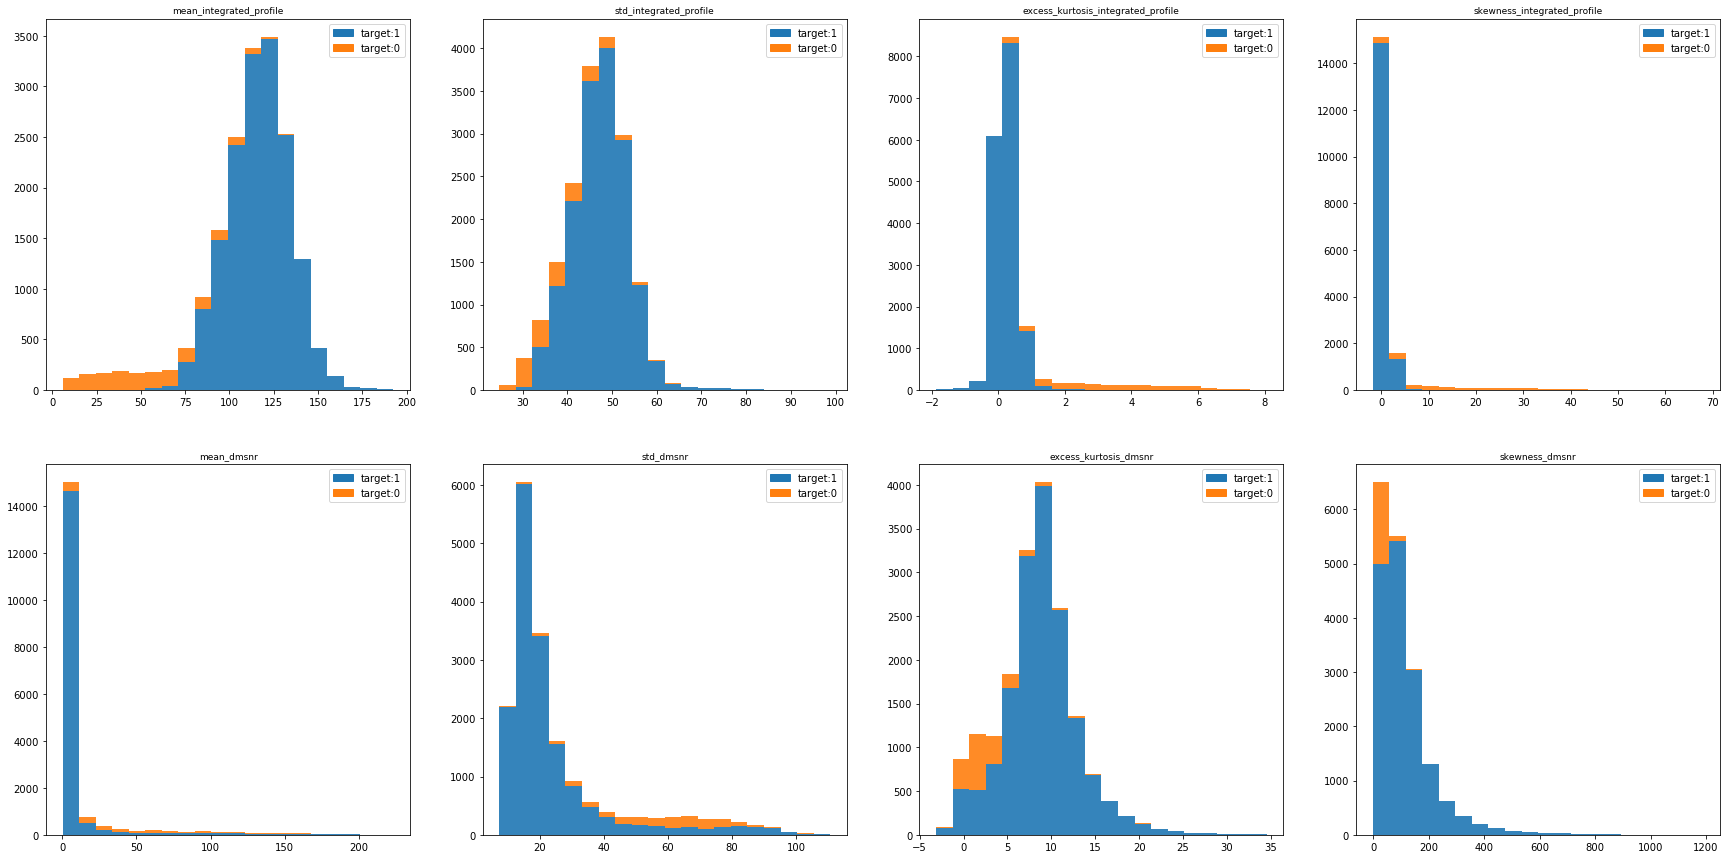

In [13]:
fig, ax = plt.subplots(2, 4,figsize=(30,15))

for i in np.arange(2):
    for j in np.arange(4):
        index=j+4*i
        ax[i,j].hist([df[df.is_pulsar==0][list(df)[index]],df[df.is_pulsar==1][list(df)[index]]],bins=20,stacked=True,density=False,alpha=0.9)
        ax[i,j].set_title(df.columns[index],fontsize=9)
        ax[i,j].legend(handles=[color1,color2])
        

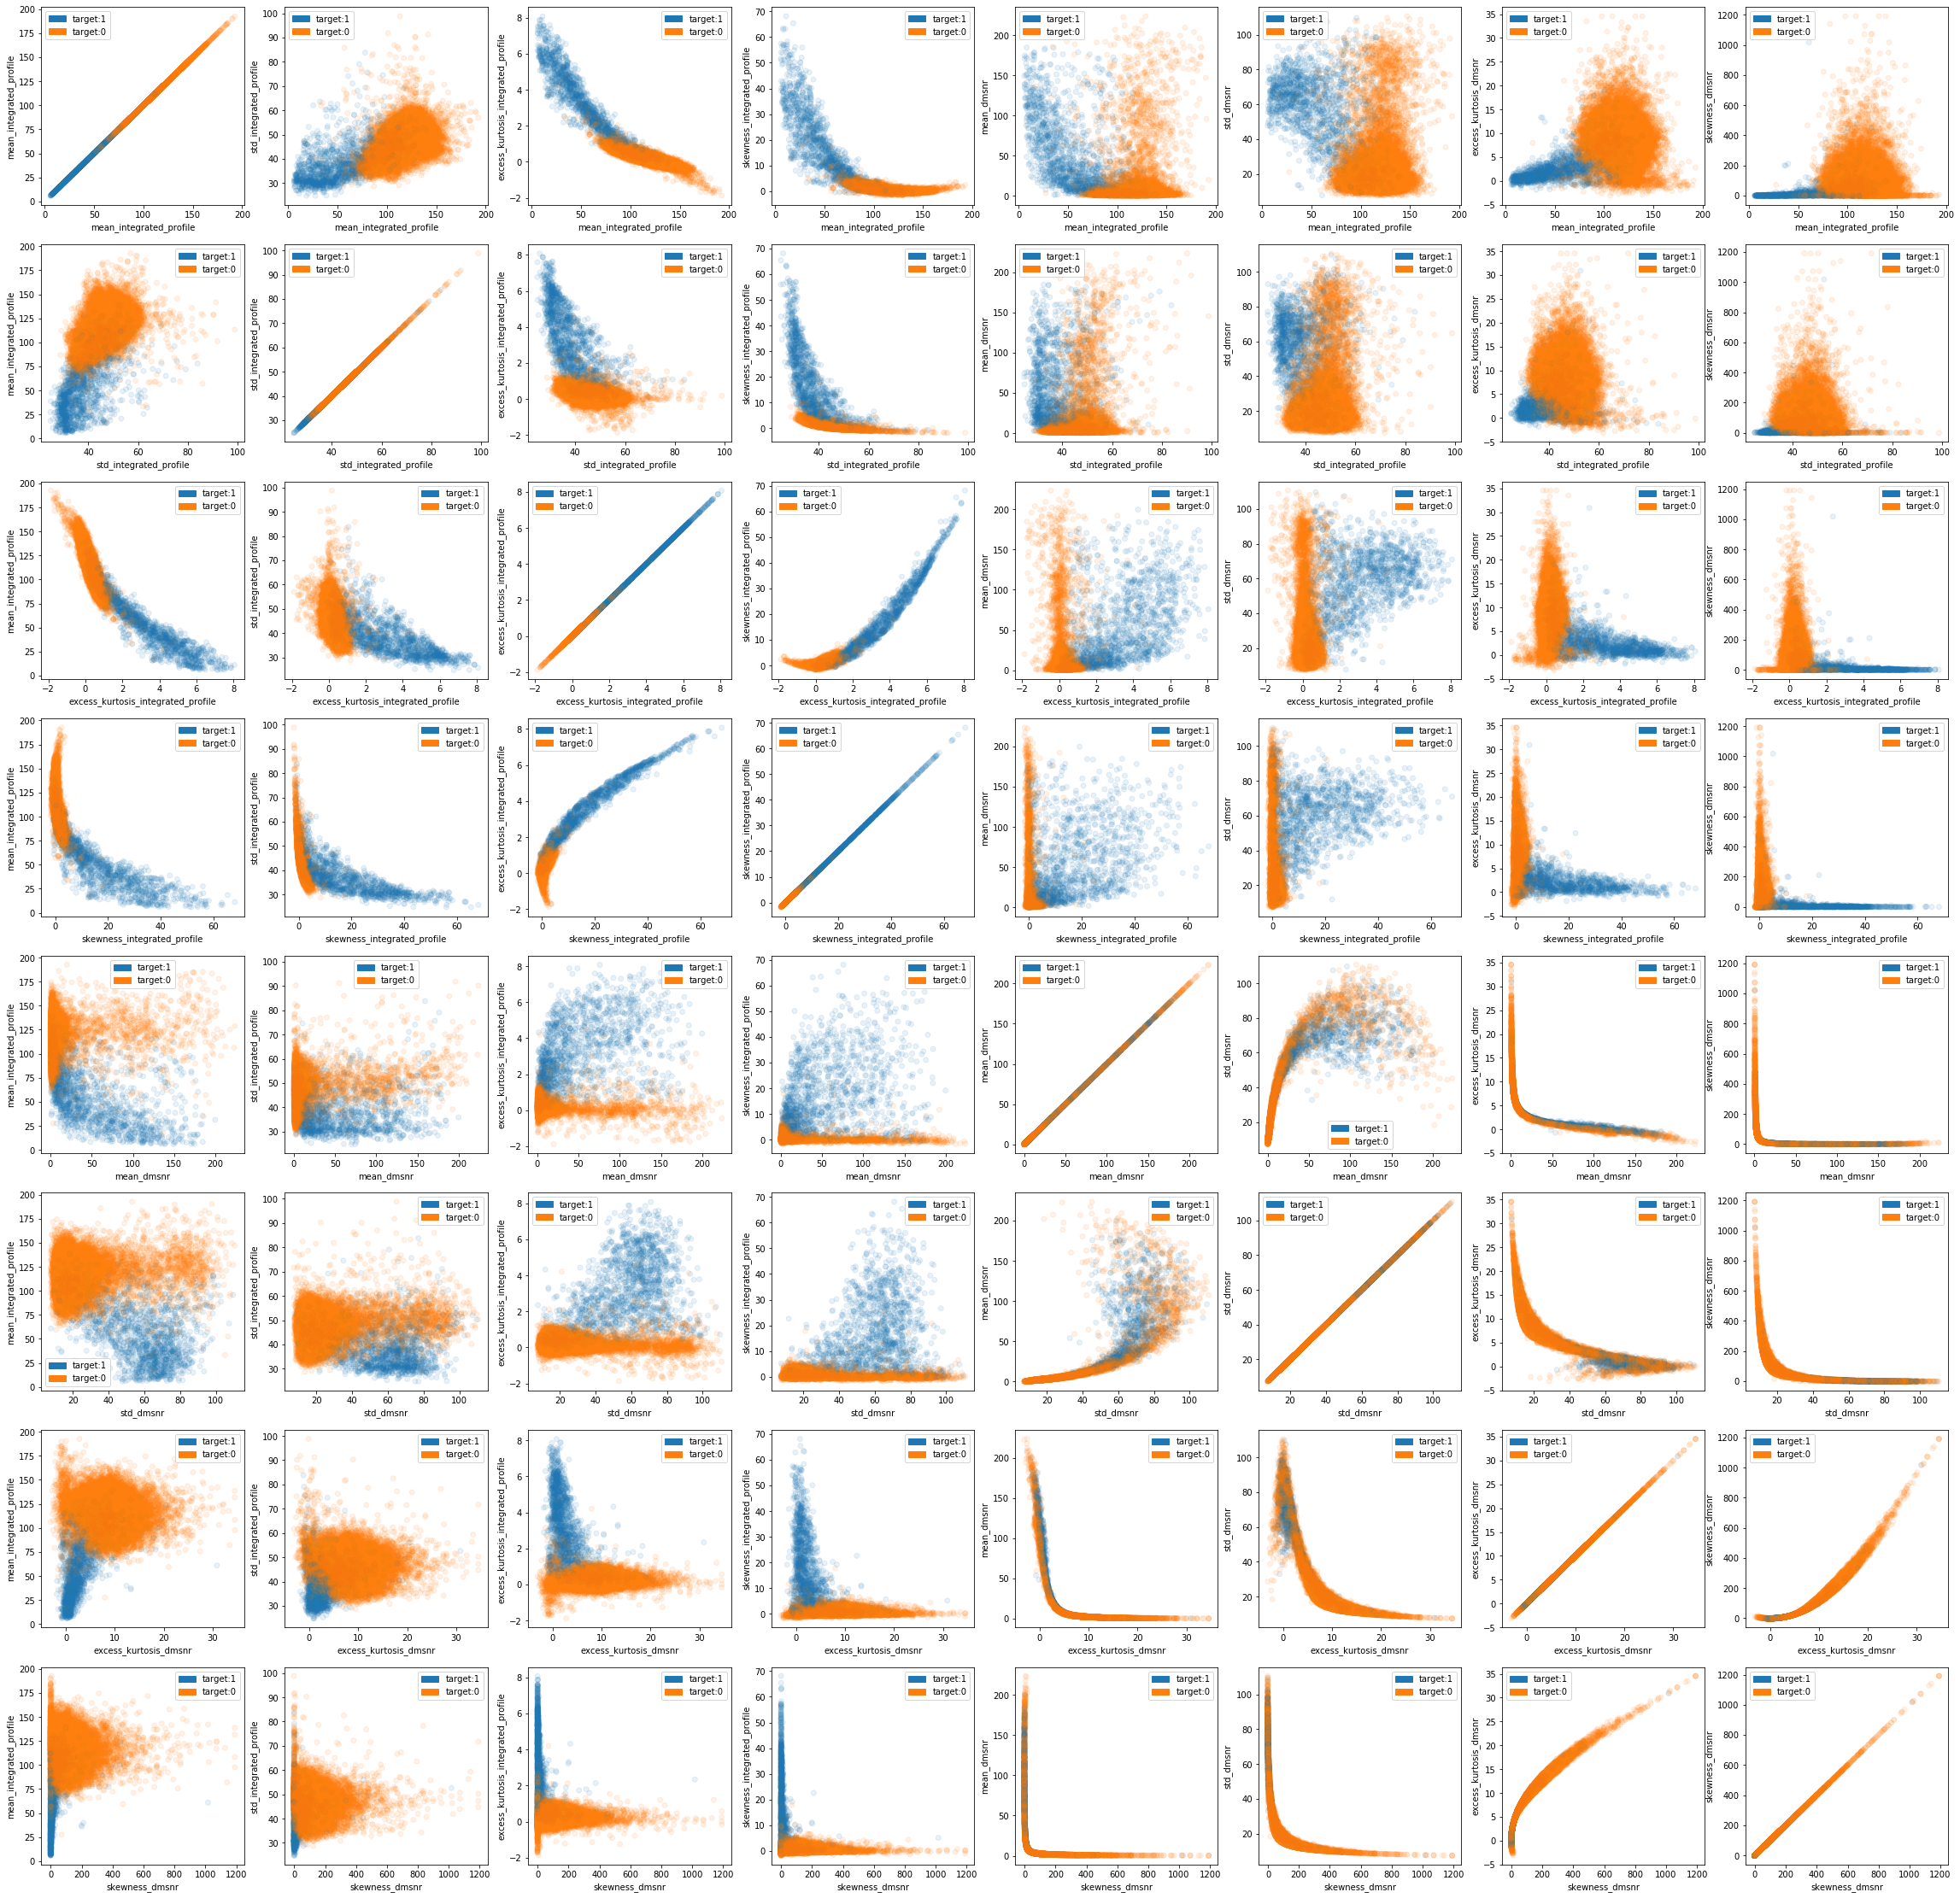

In [14]:
fig, ax = plt.subplots(8, 8,figsize=(40,40))

df_labels=df
df_labels["colour_column"] = df_labels["is_pulsar"].map(col_dict)


for i in range(8):
    for j in range(8):
        index= j+4*i
        scatter=ax[i,j].scatter(df_labels[list(df)[i]],df_labels[list(df)[j]],c=df_labels['colour_column'],alpha=0.1)
        ax[i,j].set_xlabel(df.columns[i])
        ax[i,j].set_ylabel(df.columns[j])
        ax[i,j].legend(handles=[color1,color2])


In [15]:
df_matrix=df.drop(['is_pulsar','colour_column'],axis='columns')

In [16]:
corr_matrix=df_matrix.corr()
corr_matrix

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr
mean_integrated_profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033
std_integrated_profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691
excess_kurtosis_integrated_profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491
skewness_integrated_profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782
mean_dmsnr,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269
std_dmsnr,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800
excess_kurtosis_dmsnr,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743
skewness_dmsnr,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000


## Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear el _numpy.array_ `X_raw` con las columnas predictoras de `df`.
* Crear el _numpy.array_ `y` con la columna a predecir de `df`.
* Definir un _transformer_ `StandarScaler` declarado como `scaler`, luego ajustar con los datos de `X_raw`.
* Definir el _numpy.array_ `X` luego de transformar los datos de `X_raw` con `scaler`. Verificar que tenga media nula y desviación estándar unitaria.
* Dividir la data en _train_ (90%) y _test_ (10%) utilizando como argumento `random_state=42`.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [18]:
X_raw = df_matrix.values
y = df['is_pulsar'].tolist()
df_matrix

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [19]:
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)

In [20]:
print('Promedio: ', X.mean())
print('Sesviación Estandar:',np.std(X))

Promedio:  2.381973636473685e-18
Sesviación Estandar: 1.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

<a id='logistic'></a>

## Regresión Logística

Utiliza la función `cross_validate` con el estimador `logistic` para realizar una estimación del _score_

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [23]:
logistic = LogisticRegression()
logistic_cv = cross_validate(logistic, X_train, y_train,cv=5)

In [24]:
print(f'Logistic Regression Cross Validation precision score: {np.mean(logistic_cv["test_score"]):.2f} +/- {np.std(logistic_cv["test_score"]):.2f}')

Logistic Regression Cross Validation precision score: 0.98 +/- 0.00


In [25]:
logistic.fit(X_train,y_train).score(X_test,y_test)

0.9804469273743017

<a id='knn'></a>

## K Nearest Neighbours

Utiliza `GridSearchCV` para encontrar el mejor valor de `n_neighbors`. Luego, con el mejor _estimator_ de `knn` realiza la validación cruzada para obtener el intervalo de confianza del _score_.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [27]:
parameters = np.arange(1,50)
digits_gscv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': parameters}).fit(X_train,y_train)
digits_gscv.best_params_['n_neighbors']

9

In [28]:
knn = KNeighborsClassifier(n_neighbors=digits_gscv.best_params_['n_neighbors'])
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [29]:
knn.score(X_test,y_test)

0.982122905027933

In [30]:
knn_cv = cross_validate(knn,X_train,y_train,cv=5)

In [31]:
print(f'KNN Cross Validation precision score: {np.mean(knn_cv["test_score"]):.2f} +/- {np.std(knn_cv["test_score"]):.2f} with train data.')

KNN Cross Validation precision score: 0.98 +/- 0.00 with train data.


<a id='free_style'></a>

## Support Vector Classification (SVC)

Este método consiste en clasificar los elementos de la muestra utilizando un hiperplano. De ahi en adelante considera la división del espacio producto del hiperplano como categorias. Este hiperplano se elige buscando que la distancia entre ambas muestras y el hiperplano sea máxima.

Determinaremos los mejores hiperparámetros `C`, `degree`, `shrinking`, siendo este último un creterio para usar o no algoritmos de shrinking. 

In [32]:
from sklearn import svm
from sklearn.model_selection import cross_validate

In [34]:
my_model = svm.SVC()
grid= {
        'C': np.arange(1,15), 
        'degree':np.arange(1,10),
        'shrinking':[0,1]
      }
digits_gscv = GridSearchCV(estimator=svm.SVC(), param_grid=grid).fit(X_train,y_train)
digits_gscv.best_params_

{'C': 13, 'degree': 1, 'shrinking': 0}

In [35]:
svc= svm.SVC(1, random_state=42)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.982122905027933

In [36]:
my_model_cv = cross_validate(svc,X_train,y_train)

In [37]:
print(f'MY MODEL Cross Validation precision score: {np.mean(my_model_cv["test_score"]):.2f} +/- {np.std(my_model_cv["test_score"]):.2f} with train data.')

MY MODEL Cross Validation precision score: 0.98 +/- 0.00 with train data.


<a id='model_selection'></a>

## Selección de Modelo

* Compara la _precision_ entre cada uno de los modelos.
* Grafica la matriz de confusión para cada uno de los modelos.
* Calcula un intervalo de confianza del tiempo utilizado en el ajuste de cada modelo. Ver documentación de `cross_validate`.
* Gráficos o reportes adicionales.

In [38]:
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import plot_confusion_matrix

In [39]:
print(f'Logistic Regression test precision score: {precision_score(y_test,logistic.predict(X_test)):.7f}')

Logistic Regression test precision score: 0.9357143


In [40]:
print(f'KNN test precision score: {precision_score(y_test,knn.predict(X_test)):.7f}')

KNN test precision score: 0.9370629


In [41]:
print(f'SVC test precision score: {precision_score(y_test,svc.predict(X_test)):.7f}')

SVC test precision score: 0.9496403


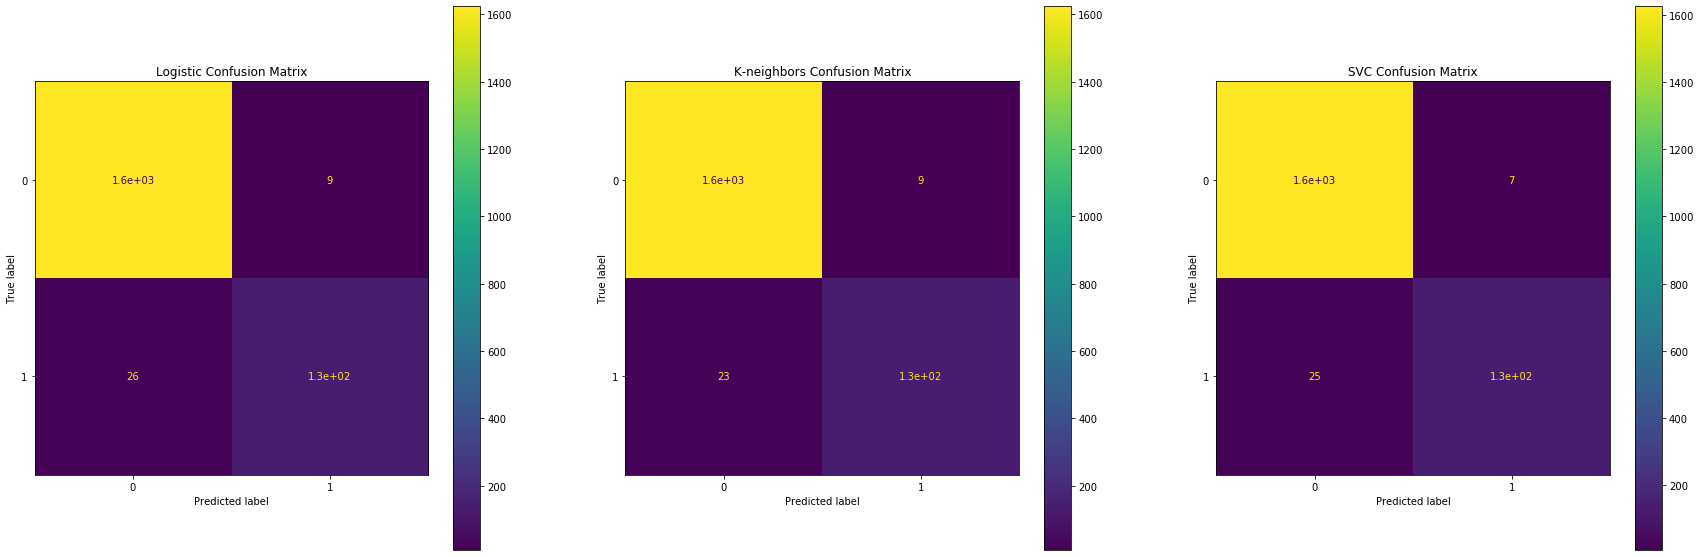

In [42]:
fig,(ax1, ax2,ax3)= plt.subplots(1,3,figsize=(30,10))

plot_confusion_matrix(logistic, X_test, y_test,ax=ax1)
ax1.set_title('Logistic Confusion Matrix')

plot_confusion_matrix(knn, X_test, y_test,ax=ax2)
ax2.set_title('K-neighbors Confusion Matrix')

plot_confusion_matrix(svc, X_test, y_test,ax=ax3)
ax3.set_title('SVC Confusion Matrix')


plt.show()

## Intervalos de confianza


In [43]:
from sklearn.model_selection import cross_validate, learning_curve, ShuffleSplit

In [44]:
print(f'Logistic Regression fit time : {np.mean(cross_validate(logistic,X_train,y_train)["fit_time"]):.10f} +/- {np.std(cross_validate(logistic,X_train,y_train)["fit_time"]):.5f} ')

Logistic Regression fit time : 0.0464687347 +/- 0.00369 


In [45]:
print(f' KNN fit time : {np.mean(cross_validate(knn,X_train,y_train)["fit_time"]):.10f} +/- {np.std(cross_validate(knn,X_train,y_train)["fit_time"]):.5f} ')

 KNN fit time : 0.0387073517 +/- 0.00062 


In [46]:
print(f'CSV fit time : {np.mean(cross_validate(svc,X_train,y_train)["fit_time"]):.10f} +/- {np.std(cross_validate(svc,X_train,y_train)["fit_time"]):.5f} ')

CSV fit time : 0.4467861652 +/- 0.00993 


<a id='conclusions'></a>

## Conclusiones

Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultados, etc.

Es claro, que en cuanto a presición, el mejor modelo fue el escogido `SVC`. Pero `SVC` también fue el método con mayor tiempo de ejecución. Por otro lado, el método `K-Neighbors`es el mas rápido y tiene el segundo score mas alto.

Estudiaremos a continuación y para concluir mas profundamente, las curvas de aprendizaje, rendimiento y escalabilidad de los métodos utilizando la función definida en el curso

In [47]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

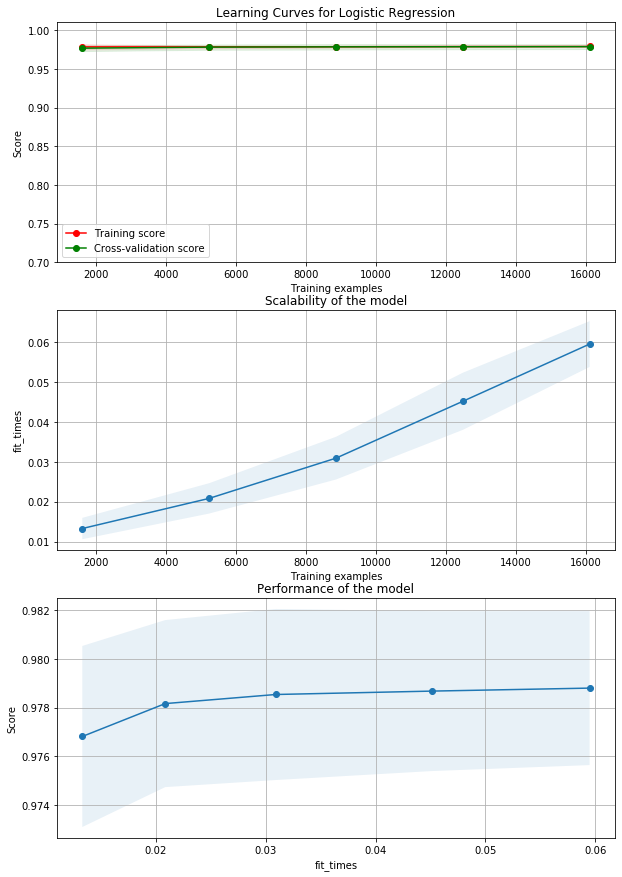

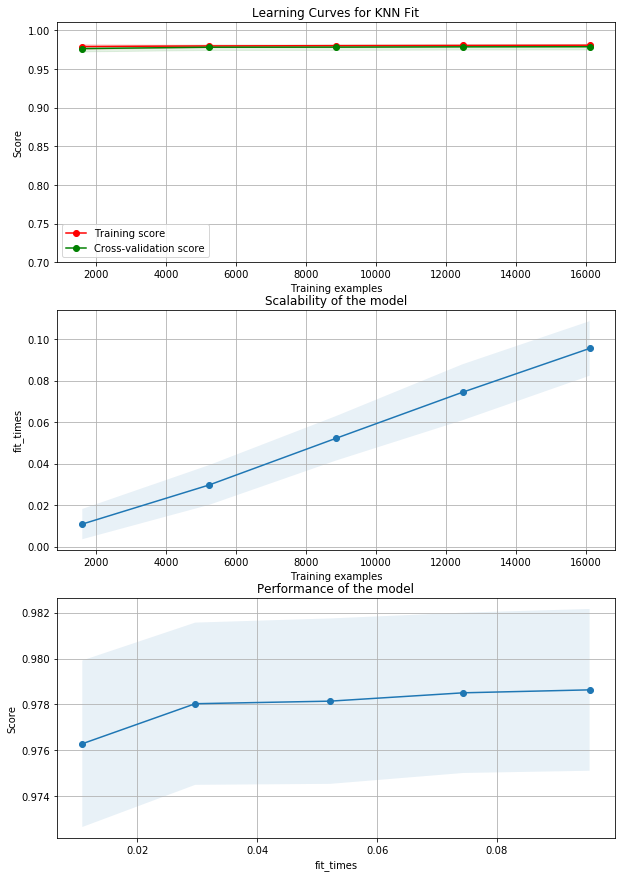

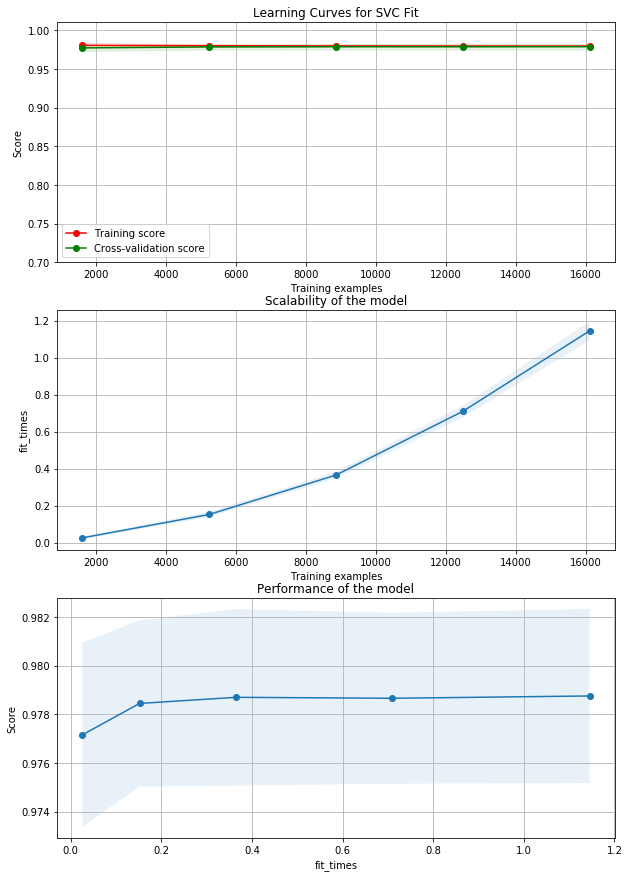

In [48]:
title=['Learning Curves for Logistic Regression', 'Learning Curves for KNN Fit', 'Learning Curves for SVC Fit']
method=[logistic,knn,svc]
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
for i in range(3):
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))
    plot_learning_curve(method[i], title[i], X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

### Para escoger un modelo en particular, tendremos en cuenta `1) rendimiento`, `2) escalabilidad` y `3)presición`.

Por lo mencionado en los puntos anteriores "siguen en competencia" los métodos `KNN` y `SVC`, comparando estos en los aspectos mencionados podemos ver que

1.- En cuanto a rendimiento `KNN` es mas rápido, y como en general el número de datos que debemos estudiar es bastante grande, escoger `KNN` en vez de `SVC` nos entregará mejores tiempos de ejecución.
2.- De los gráficos anterirores podemos ver que el modelo `SVC` es claramente mejor en cuanto a escalabilidad que los otros métodos, nuevamente seguido por `KNN`

3.- Ya hemos comentado que el orden en cuanto a presición es: `SVC`, `KNN` y finalmente `LogisticRegression`.

Teniendo en cuenta estos 3 criterios, recomendaria dependiendo del poder de procesamiento usar `KNN` en caso de priorizar tiempo de ejecución, y en general para mayor precision definitivamente usar `SVC`

### Uso del precision score

Utilizamos precision,

`The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.`

Esto es, que clasificaremos los datos como positivo real o falso positivo. lo que nos permite una rapida clasificación y estudio del error.

## Trabajos Futuros

Podria estudiarse el rendimiento de los mismos métodos, habiendo hecho el estudio previo de la correlacion entre ser outlier y ser pulsar, de tal manera de realizar experimentos sobre muestras con y sin estos outliersl, concluyendo si son o no relevantes para el entrenamiento y predicciones